In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup as bs
import glob
import os
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
display(HTML("<style>.container { width: 90% !important; }</style>"))

In [2]:

data=requests.get("http://openapi.airkorea.or.kr/openapi/services/rest/ArpltnInforInqireSvc/getMsrstnAcctoRltmMesureDnsty?stationName=강남구&dataTerm=3MONTH&pageNo=1&numOfRows=100&ServiceKey=uWcDgu8b4msGBpJVMLudLsfYadK9EGBnuCk3TyON1rMfhVuzLVwJ1t2tPlCwfBINamWnDZ3qokqGGqh%2B2oxmPA%3D%3D&ver=1.3")

In [3]:
data

<Response [200]>

In [4]:
print(data[0])

TypeError: 'Response' object is not subscriptable

In [6]:
soup=bs(data.text)

In [7]:
print(soup)

<?xml version="1.0" encoding="UTF-8"?><html><body><response>
<header>
<resultcode>00</resultcode>
<resultmsg>NORMAL SERVICE.</resultmsg>
</header>
<items>
<item>
<datatime>2020-10-05 18:00</datatime>
<mangname>도시대기</mangname>
<so2value>0.003</so2value>
<covalue>0.4</covalue>
<o3value>0.024</o3value>
<no2value>0.011</no2value>
<pm10value>18</pm10value>
<pm10value24>21</pm10value24>
<pm25value>10</pm25value>
<pm25value24>9</pm25value24>
<khaivalue>40</khaivalue>
<khaigrade>1</khaigrade>
<so2grade>1</so2grade>
<cograde>1</cograde>
<o3grade>1</o3grade>
<no2grade>1</no2grade>
<pm10grade>1</pm10grade>
<pm25grade>1</pm25grade>
<pm10grade1h>1</pm10grade1h>
<pm25grade1h>1</pm25grade1h>
</item>
<item>
<datatime>2020-10-05 17:00</datatime>
<mangname>도시대기</mangname>
<so2value>0.003</so2value>
<covalue>0.4</covalue>
<o3value>0.028</o3value>
<no2value>0.008</no2value>
<pm10value>21</pm10value>
<pm10value24>22</pm10value24>
<pm25value>8</pm25value>
<pm25value24>8</pm25value24>
<khaivalue>47</khaivalu

In [8]:

data2=requests.get("http://openapi.airkorea.or.kr/openapi/services/rest/MsrstnInfoInqireSvc/getTMStdrCrdnt?addr=서울&stationName=강남구&pageNo=1&numOfRows=100&ServiceKey=uWcDgu8b4msGBpJVMLudLsfYadK9EGBnuCk3TyON1rMfhVuzLVwJ1t2tPlCwfBINamWnDZ3qokqGGqh%2B2oxmPA%3D%3D")

In [9]:
data3=requests.get("http://openapi.airkorea.or.kr/openapi/services/rest/MsrstnInfoInqireSvc/getMsrstnList?addr=서울&stationName=강남구&pageNo=1&numOfRows=100&ServiceKey=uWcDgu8b4msGBpJVMLudLsfYadK9EGBnuCk3TyON1rMfhVuzLVwJ1t2tPlCwfBINamWnDZ3qokqGGqh%2B2oxmPA%3D%3D")

In [10]:
soup=bs(data3.text)

In [11]:
print(soup)

<?xml version="1.0" encoding="UTF-8"?><html><body><response>
<header>
<resultcode>00</resultcode>
<resultmsg>NORMAL SERVICE.</resultmsg>
</header>
<items>
<item>
<stationname>강남구</stationname>
<addr>서울 강남구 학동로 426강남구청 별관 1동</addr>
<year>1978</year>
<oper>서울특별시보건환경연구원</oper>
<photo>http://www.airkorea.or.kr/airkorea/station_photo/NAMIS/station_images/111261/INSIDE_OTHER_1.bmp</photo>
<vrml>http://www.airkorea.or.kr/airkorea/vrml/111261.swf</vrml>
<map>http://www.airkorea.or.kr/airkorea/station_map/111261.gif</map>
<mangname>도시대기</mangname>
<item>SO2, CO, O3, NO2, PM10, PM2.5</item>
<dmx>37.517562</dmx>
<dmy>127.047289</dmy>
</item>
</items>
<numofrows>100</numofrows>
<pageno>1</pageno>
<totalcount>1</totalcount>
</response>
</body></html>


In [12]:
soup=bs(data.text)

In [13]:
bam_recent=pd.DataFrame([[t.datatime.text,t.pm10value.text,t.pm25value.text] for t in soup.find_all("items")[0].find_all('item')])
bam_recent.columns=['날짜','PM10','PM2.5']
def change_time(x):
    if x.find("24:00") !=-1:
        return np.nan
    else:
        return pd.to_datetime(x)

bam_recent['날짜'] =bam_recent['날짜'].apply(change_time)

In [14]:
bam_recent

,날짜,PM10,PM2.5
0,2020-10-05 18:00:00,18,10
1,2020-10-05 17:00:00,21,8
2,2020-10-05 16:00:00,20,6
3,2020-10-05 15:00:00,22,10
4,2020-10-05 14:00:00,24,8
...,...,...,...
95,2020-10-01 19:00:00,22,17
96,2020-10-01 18:00:00,24,19
97,2020-10-01 17:00:00,29,26
98,2020-10-01 16:00:00,26,22


In [46]:
bam_recent['PM10']

0     18
1     21
2     20
3     22
4     24
      ..
95    22
96    24
97    29
98    26
99    20
Name: PM10, Length: 100, dtype: object

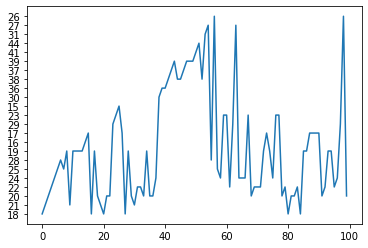

In [49]:
plt.plot(bam_recent['PM10'])
plt.show()

In [15]:
fi =pd.concat([df,bam_recent[::-1].reset_index(drop=True)])
fi2 =fi.drop_duplicates('날짜')
fi3=fi2.dropna(subset=['날짜'],axis=0)

NameError: name 'df' is not defined

In [16]:
filename="./last/bam_gangnam_"+datetime.datetime.now().strftime("%m-%d_%H_%M")+".csv"
fi3.to_csv(filename,encoding='utf-8-sig')
os.remove(data_path)

NameError: name 'fi3' is not defined

In [17]:
import matplotlib.pyplot as plt

In [18]:
fi3[['PM10','PM2.5']]=fi3[['PM10','PM2.5']].apply(pd.to_numeric,errors='coerce')

NameError: name 'fi3' is not defined

In [19]:
fi4=fi3.dropna(subset=['PM10','PM2.5']).reset_index(drop=True)

NameError: name 'fi3' is not defined

In [20]:
fi4.head()

NameError: name 'fi4' is not defined

In [21]:
plt.plot(fi4['PM2.5'])
plt.xticks

NameError: name 'fi4' is not defined

In [22]:
fi4['날짜'] =pd.to_datetime(fi4['날짜']) - datetime.timedelta(hours=1)

NameError: name 'fi4' is not defined

In [23]:
fi4

NameError: name 'fi4' is not defined

In [24]:
glob.glob("./last/*.*")

[]

In [25]:
d2=pd.read_csv(r"C:\Users\ds\Desktop\programming\omni_data\thingplug_update\last\totalDMU3_09-17_10_21.csv",index_col=0)
d2=d2.reset_index()
d2.time =pd.to_datetime(d2.time)    
dd=d2.loc[d2.time.dt.date !=pd.to_datetime("2020-05-20")]

FileNotFoundError: [Errno 2] File b'C:\\Users\\ds\\Desktop\\programming\\omni_data\\thingplug_update\\last\\totalDMU3_09-17_10_21.csv' does not exist: b'C:\\Users\\ds\\Desktop\\programming\\omni_data\\thingplug_update\\last\\totalDMU3_09-17_10_21.csv'

In [26]:
def data_load(path,name):
    d2=pd.read_csv(path,index_col=0)
    d2=d2.reset_index()
    d2.time =pd.to_datetime(d2.time)    
    d2=d2.loc[(d2.time > pd.to_datetime("2020-04-25"))].reset_index(drop=True)
    dd=d2.loc[d2.time.dt.date !=pd.to_datetime("2020-05-20")]
    dd=dd.reset_index(drop=True)
    dd=dd.loc[dd.time.dt.date !=pd.to_datetime("2020-06-30")]
    dd=dd.loc[dd.time.dt.date !=pd.to_datetime("2020-07-10")]
    dd=dd.loc[dd.time.dt.date !=pd.to_datetime("2020-07-12")]
    dd=dd.loc[dd.time.dt.date !=pd.to_datetime("2020-07-13")]
    dd=dd.loc[dd.time.dt.date !=pd.to_datetime("2020-07-14")]
    dd=dd.loc[(dd.time <=pd.to_datetime("2020-07-23")) | (dd.time >=pd.to_datetime("2020-08-06"))]
    
    
    
    
    
    
    
    dd.columns = ['time']+[x+"_"+name for x in dd.columns[1:]]
    d2r=dd.set_index('time')
    d2m = dd.groupby(dd['time'].astype("<M8[m]")).mean()
    
    
    return d2r,d2m

d2r,d2m =data_load(glob.glob("./last/*.*")[2],'DMU2')
d3r,d3m =data_load(glob.glob("./last/*.*")[3],'DMU3')

IndexError: list index out of range

In [27]:
d23=pd.concat([d2m,d3m],axis=1,join='inner')

NameError: name 'd2m' is not defined

In [28]:
d23.head()

NameError: name 'd23' is not defined

In [29]:
ax_ = [ax1,ax2,ax3,ax4]
for num in range(0,198164,4000):
    figure, (ax1,ax2,ax3,ax4) = plt.subplots(nrows=1, ncols=4)
    figure.set_size_inches(25, 5)

    ax1.plot(d23[num:num+1000]['RAW_DMU2'],label='DMU2')
    ax1.plot(d23[num:num+1000]['RAW_DMU3'],label='DMU3')
    ax1.legend()
    plt.sca(ax1)
    plt.xticks(rotation=30)

    num+=1000
    ax2.plot(d23[num:num+1000]['RAW_DMU2'],label='DMU2')
    ax2.plot(d23[num:num+1000]['RAW_DMU3'],label='DMU3')
    plt.sca(ax2)
    plt.xticks(rotation=30)

    num+=1000
    ax3.plot(d23[num:num+1000]['RAW_DMU2'],label='DMU2')
    ax3.plot(d23[num:num+1000]['RAW_DMU3'],label='DMU3')
    plt.sca(ax3)
    plt.xticks(rotation=30)

    num+=1000
    ax4.plot(d23[num:num+1000]['RAW_DMU2'],label='DMU2')
    ax4.plot(d23[num:num+1000]['RAW_DMU3'],label='DMU3')
    plt.sca(ax4)
    plt.xticks(rotation=30)
    
    plt.show()

NameError: name 'ax1' is not defined

In [30]:
d23.head()

NameError: name 'd23' is not defined

In [31]:
ax_ = [ax1,ax2,ax3,ax4]

rn=8000
rn_h =int(rn/2)
for num in range(5000,198164,rn):
    figure, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(nrows=1, ncols=6)
    figure.set_size_inches(25, 5)

    ax1.plot(d23[num:num+rn_h]['RAW_DMU2'],label='DMU2')
    ax1.plot(d23[num:num+rn_h]['RAW_DMU3'],label='DMU3')
    ax1.legend()
    plt.sca(ax1)
    plt.xticks(rotation=30)

    ax2.plot(d23[num:num+rn_h]['RH_DMU2'],label='DMU2')
    ax2.plot(d23[num:num+rn_h]['RH_DMU3'],label='DMU3')
    ax2.legend()
    plt.sca(ax2)
    plt.xticks(rotation=30)

    ax3.plot(d23[num:num+rn_h]['TEMP_DMU2'],label='DMU2')
    ax3.plot(d23[num:num+rn_h]['TEMP_DMU3'],label='DMU3')
    ax3.legend()
    plt.sca(ax3)
    plt.xticks(rotation=30)

    num+=rn_h
    ax4.plot(d23[num:num+rn_h]['RAW_DMU2'],label='DMU2')
    ax4.plot(d23[num:num+rn_h]['RAW_DMU3'],label='DMU3')
    ax4.legend()
    plt.sca(ax4)
    plt.xticks(rotation=30)
    
    ax5.plot(d23[num:num+rn_h]['RH_DMU2'],label='DMU2')
    ax5.plot(d23[num:num+rn_h]['RH_DMU3'],label='DMU3')
    ax5.legend()
    plt.sca(ax5)
    plt.xticks(rotation=30)
    
    ax6.plot(d23[num:num+rn_h]['TEMP_DMU2'],label='DMU2')
    ax6.plot(d23[num:num+rn_h]['TEMP_DMU3'],label='DMU3')
    ax6.legend()
    plt.sca(ax6)
    plt.xticks(rotation=30)
    
    
    
    plt.show()

NameError: name 'ax1' is not defined

In [32]:
plt.scatter(d23_pre['RAW_DMU2'],d23_pre['RAW_DMU3'])
plt.plot(range(100),range(100),color='r')
plt.xlabel("DMU2")
plt.ylabel("DMU3")

NameError: name 'd23_pre' is not defined

In [33]:
d23_pre

NameError: name 'd23_pre' is not defined

In [34]:
d23

NameError: name 'd23' is not defined

In [35]:
d23

NameError: name 'd23' is not defined

In [36]:
def remove_data(df):
    df2=df.loc[df.index]

In [37]:
import seaborn as sns

In [38]:
n=0

ax_ = [ax1,ax2,ax3,ax4]
for ww in range(400,800,4):
    figure, (ax1,ax2,ax3,ax4) = plt.subplots(nrows=1, ncols=4)
    figure.set_size_inches(20, 10)
    lo1=d2.loc[(pd.to_datetime(d2.time)>=pd.to_datetime("2020-05-1 15:00:00")+datetime.timedelta(hours=ww)) & (pd.to_datetime(d2.time)<pd.to_datetime("2020-05-1 16:00:00")+datetime.timedelta(hours=ww))]
    lo2=d2.loc[(pd.to_datetime(d2.time)>=pd.to_datetime("2020-05-1 15:00:00")+datetime.timedelta(hours=ww+1)) & (pd.to_datetime(d2.time)<pd.to_datetime("2020-05-1 16:00:00")+datetime.timedelta(hours=ww+1))]
    lo3=d2.loc[(pd.to_datetime(d2.time)>=pd.to_datetime("2020-05-1 15:00:00")+datetime.timedelta(hours=ww+2)) & (pd.to_datetime(d2.time)<pd.to_datetime("2020-05-1 16:00:00")+datetime.timedelta(hours=ww+2))]
    lo4=d2.loc[(pd.to_datetime(d2.time)>=pd.to_datetime("2020-05-1 15:00:00")+datetime.timedelta(hours=ww+3)) & (pd.to_datetime(d2.time)<pd.to_datetime("2020-05-1 16:00:00")+datetime.timedelta(hours=ww+3))]

    sns.boxplot(lo1['RAW'].values, ax=ax1)
    sns.boxplot(lo2['RAW'].values, ax=ax2)
    sns.boxplot(lo3['RAW'].values, ax=ax3)
    sns.boxplot(lo4['RAW'].values, ax=ax4)
    plt.show()
    


NameError: name 'ax1' is not defined

In [39]:
d2

NameError: name 'd2' is not defined

In [40]:
plt.plot(d2['RAW'])

NameError: name 'd2' is not defined